# Descripción del problema:
### Predicción del salario de una persona en función a sus características.
El objetivo del problema es predecir si una persona tiene un salario de más de 50 mil dólares anuales o no, en base a sus características.

Haremos uso del dataset Adult. Este dataset proviene de la siguiente ruta de la University of California Irvine (Url: https://archive.ics.uci.edu/ml/datasets/Census+Income)

Descripción del dataset: Cuenta con un total de 14 variables predictoras X y una variable continua a predecir Y.

El número total de muestras es de 32561 personas.

### Información de las variables:

##### Variable dependiente Y: TARGET: >50K, <=50K.

##### Variables independientes X:

* age: continuous.

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* fnlwgt: continuous.

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* education-num: continuous.

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* sex: Female, Male.

* capital-gain: continuous.

* capital-loss: continuous.

* hours-per-week: continuous.

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Carga de librerías:

In [3]:
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Definición de funciones:

In [4]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor de y sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4.; fig_tamanio = 4.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

## Lectura de datos:

In [7]:
# Defino la lista de nombres de las variables
nombres_columnas = ['edad', 'clase_trabajo', 'fnlwgt', 'educacion',
                   'educacion_num', 'estado_civil', 'ocupacion',
                    'relaciones', 'raza', 'sexo', 'ganancia_capital',
                    'perdida_capital', 'horas_por_semana', 'pais_nacimiento', 'target']
# Leo el dataset, el cual tiene un separador especial... lo normal es encontrarse ficheros
# separados por ',' o por ';'
XY = pd.read_csv("C:\\Users\\Playtomic\\Downloads\\census+income\\adult.data", sep=', ', names=nombres_columnas, index_col=False)

In [8]:
XY[:2]

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
print(u'- El número de filas en el dataset es:', XY.shape[0])
print(u'- El número de columnas en el dataset es:', XY.shape[1])
print(u'- Los nombres de las variables son:', XY.columns)
XY[:2]

- El número de filas en el dataset es: 32561
- El número de columnas en el dataset es: 15
- Los nombres de las variables son: Index(['edad', 'clase_trabajo', 'fnlwgt', 'educacion', 'educacion_num',
       'estado_civil', 'ocupacion', 'relaciones', 'raza', 'sexo',
       'ganancia_capital', 'perdida_capital', 'horas_por_semana',
       'pais_nacimiento', 'target'],
      dtype='object')


,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Preprocesamiento de datos

### Missings:

Represento el conteo de valores faltantes por variable. En caso de haber, una de las formas de rellenarlos es:

In [10]:
XY.isnull().sum()

edad                0
clase_trabajo       0
fnlwgt              0
educacion           0
educacion_num       0
estado_civil        0
ocupacion           0
relaciones          0
raza                0
sexo                0
ganancia_capital    0
perdida_capital     0
horas_por_semana    0
pais_nacimiento     0
target              0
dtype: int64

## Categóricas a numéricas:

Es necesario convertir las variables categóricas a numéricas de cara a introducirlas en modelos:

In [11]:
# Lista de variables categóricas
XY.select_dtypes(exclude=['number']).columns

Index(['clase_trabajo', 'educacion', 'estado_civil', 'ocupacion', 'relaciones',
       'raza', 'sexo', 'pais_nacimiento', 'target'],
      dtype='object')

In [13]:
# Este objeto codifica las variables categóricas a números distintos.
le = LabelEncoder()

In [14]:
XY.clase_trabajo.value_counts()

clase_trabajo
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Las muestras que sean distintas de Private los codifico como 0s, los Private como 1s.

In [15]:
XY.loc[XY['clase_trabajo'] != 'Private', 'clase_trabajo'] = 0
XY.loc[XY['clase_trabajo'] == 'Private', 'clase_trabajo'] = 1
XY['clase_trabajo'] = XY['clase_trabajo'].astype(int)

### educacion

In [19]:
XY.educacion.value_counts()

educacion
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Realizamos el cambio con un mapeo de valores uno por uno

In [20]:
dic = {'Doctorate':0, 'Masters':1, 'Bachelors': 2, 'Some-college':3, 'Assoc-voc':4,
       'Assoc-acdm': 5, 'HS-grad': 6, 'Prof-school': 7, 'Preschool': 8,
       '12th': 9, '11th': 10, '10th': 11, '9th': 12, '7th-8th': 13,
       '5th-6th': 14, '1st-4th':15}
XY["educacion"].replace(dic, inplace=True)

### estado_civil

In [21]:
XY.estado_civil.value_counts()

estado_civil
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [22]:
# Codifico con label encoder.
XY.estado_civil = le.fit_transform(XY.estado_civil)

### ocupacion

In [24]:
XY.ocupacion.value_counts()

ocupacion
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [25]:
XY.ocupacion = le.fit_transform(XY.ocupacion.values)

### relaciones

In [26]:
XY.relaciones.value_counts()

relaciones
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [27]:
XY.relaciones = le.fit_transform(XY.relaciones.values)

### raza

In [28]:
XY.raza.value_counts()

raza
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [29]:
XY.loc[XY.raza != 'White', 'raza'] = 0
XY.loc[XY.raza == 'White', 'raza'] = 1
XY.raza = XY.raza.astype(int)

### sexo

In [31]:
XY.sexo.value_counts()

sexo
Male      21790
Female    10771
Name: count, dtype: int64

In [33]:
dic = {'Male':0, 'Female':1}
XY.sexo.replace(dic, inplace=True)

In [34]:
XY.pais_nacimiento.value_counts()

pais_nacimiento
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France      

In [35]:
XY.loc[XY.pais_nacimiento != 'United-States', 'pais_nacimiento'] = 0
XY.loc[XY.pais_nacimiento == 'United-States', 'pais_nacimiento'] = 1
XY.pais_nacimiento = XY.pais_nacimiento.astype(int)

### target

In [37]:
XY.target.value_counts()

target
<=50K    24720
>50K      7841
Name: count, dtype: int64

La mayoría de las veces las targets hay que codificarlas.
En este caso, la target la codifico a 0s si es <50K y a 1s si es >50K.

In [38]:
dic = {'<=50K':0, '>50K':1}
XY.target.replace(dic, inplace=True)

### Comprobación tipos no numéricos:

In [39]:
XY.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

### DIvision en features X + target Y

In [45]:
X = XY.drop('target', axis=1)
Y = XY['target']
#Basicamente hacemos que la columna target esté separada completamente de nuestro dataframe XY

### Visualizaciones y correlaciones

### Descriptivos básicos:

In [44]:
XY.describe()

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.697030,1.897784e+05,4.922238,10.080679,2.611836,6.572740,1.446362,0.854274,0.330795,1077.648844,87.303830,40.437456,0.895857,0.240810
std,13.640433,0.459549,1.055500e+05,3.085071,2.572720,1.506222,4.228857,1.606771,0.352837,0.470506,7385.292085,402.960219,12.347429,0.305451,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.178270e+05,3.000000,9.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,5.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,6.000000,12.000000,4.000000,10.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


### Boxplots:

In [46]:
# We need to take in consideration Standardization (or normalization) which is the a process used in statistics and machine learning to transform the data so that it has a mean of 0 and a standard deviation of 1. This is done on a per-feature (column) basis.
# In summary, standardizing the data makes it easier to compare and interpret the contribution of different features, especially in situations where the features have different units or scales.
X_normalizado = (X-X.mean())/X.std()

In [49]:
X_normalizado[:2]

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento
0,0.030670,-1.516769,-1.063594,-0.947219,1.134721,0.921620,-1.317789,-0.277801,0.413013,-0.703061,0.148451,-0.216656,-0.035429,0.340949
1,0.837096,-1.516769,-1.008692,-0.947219,1.134721,-0.406206,-0.608377,-0.900167,0.413013,-0.703061,-0.145918,-0.216656,-2.222119,0.340949


Text(0.5, 1.0, 'Representacion Boxplot de las variables independientes')

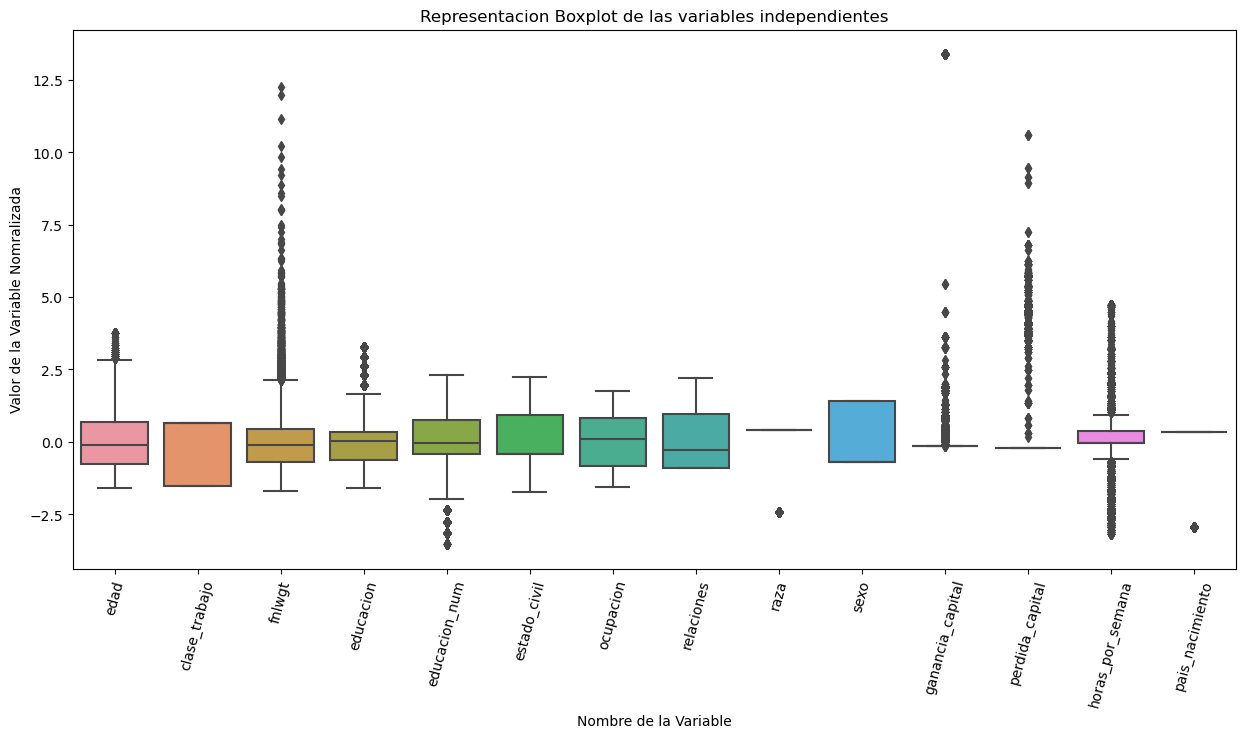

In [53]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data = X_normalizado)
plt.xticks(rotation = 75)
plt.xlabel('Nombre de la Variable')
plt.ylabel('Valor de la Variable Nomralizada')
plt.title('Representacion Boxplot de las variables independientes')

### Histogramas:

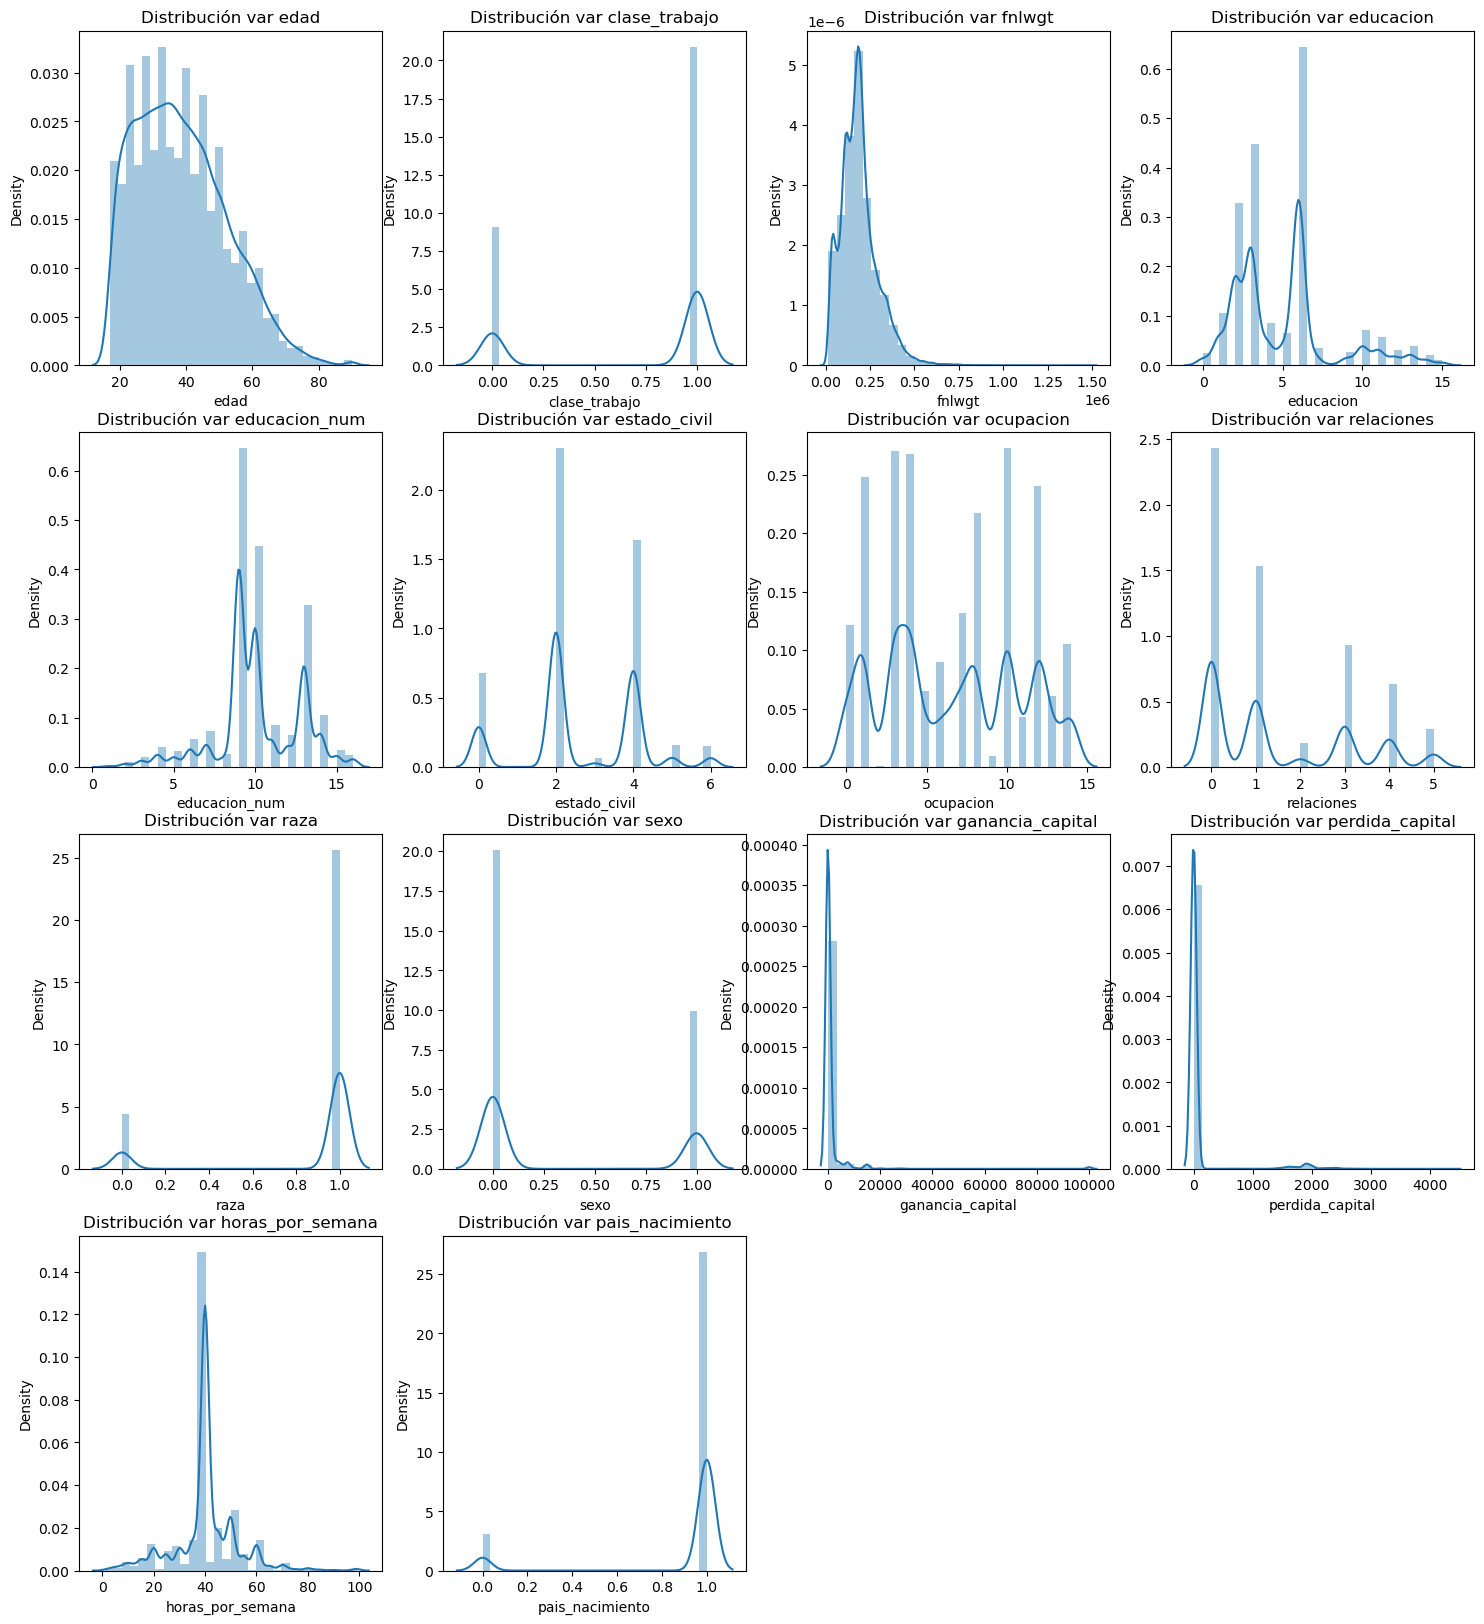

In [54]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(X.columns):
    n+=1
    plt.subplot(4, 4, n)
    sns.distplot(X[column], bins = 30)
    plt.title('Distribución var {}'.format(column))

### Matriz de correlaciones

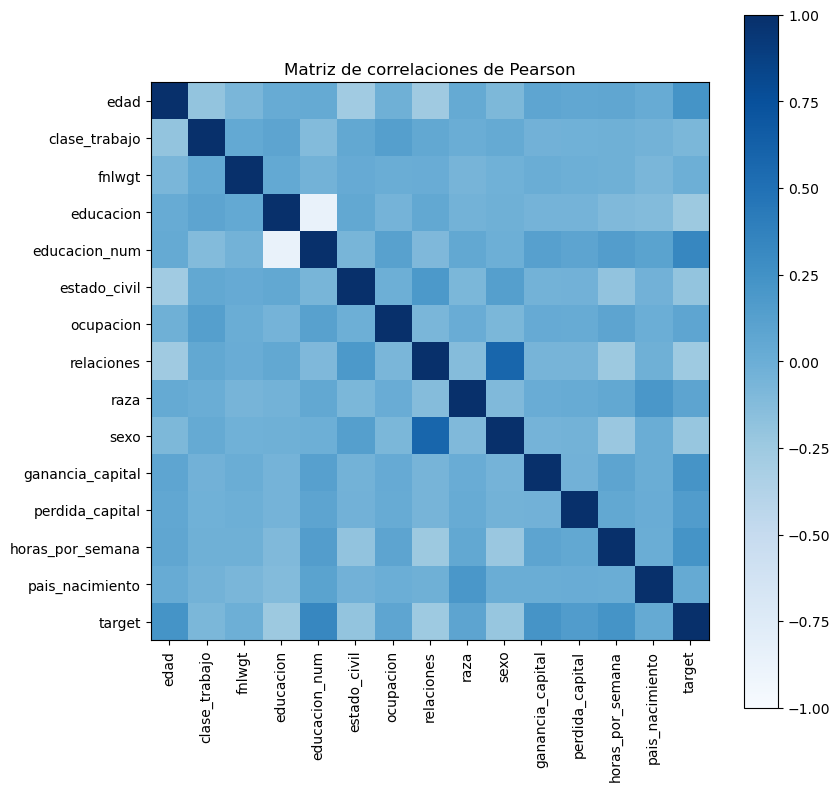

In [70]:
matriz_correlaciones = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

In [75]:
df = pd.concat([X, Y], axis=1)

# Calculamos las correlaciones entre todas las variables y la variable target
correlations = df.corr()

# Selecciona las variables con mayor correlación (en valor absoluto) con la variable target
target_correlations = correlations['target'].sort_values(ascending=False)
target_correlations



target              1.000000
educacion_num       0.335154
edad                0.234037
horas_por_semana    0.229689
ganancia_capital    0.223329
perdida_capital     0.150526
raza                0.085224
ocupacion           0.075468
pais_nacimiento     0.034470
fnlwgt             -0.009463
clase_trabajo      -0.078528
estado_civil       -0.199307
sexo               -0.215980
educacion          -0.244846
relaciones         -0.250918
Name: target, dtype: float64

### Estandarización de los datos previa:

Como se comenta en la unidad, hay modelos que parten de la hipótesis que los datos son centrados y, por tanto, se necesita estandarizar. Suele ser una buena práctica porque no suele perjudicar. Además, la inversa se puede realizar de forma sencilla.

In [77]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División en train y test:

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)
#Explicacion de este codigo:
# X_estandarizado: mis datos estandarizados
# Y: la variable objetivo.
# test_size=0.2: Indica que el 20% de los datos se utilizarán como conjunto de prueba, y el 80% restante se utilizará como conjunto de entrenamiento.
# random_state=0: Proporciona una semilla para la generación de números aleatorios. Esto asegura que la división sea reproducible, es decir, si vuelves a ejecutar el código con la misma semilla, obtendrás la misma división.


## Aplicamos un modelo de regresión logística

### Optimizando C y class_weight con GridSearch

In [82]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}
#C: Este parámetro controla la fuerza de regularización. Valores más pequeños especifican una regularización más fuerte. En mi caso, estoy probando varios valores desde 0. hasta 0.09 en incrementos de 0.01.
#class_weight: Este parámetro se utiliza para manejar el desequilibrio de clases. 
#'balanced' indica que el modelo ajustará automáticamente los pesos de clase de manera inversamente proporcional al número de muestras en cada clase. 
#None significa que no se aplicará ningún peso de clase.

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de C y class_weights.

In [83]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)
# modelo_gs: Aquí están creando una nueva instancia de GridSearchCV llamada modelo_gs.

# modelo: El modelo base que están utilizando, en este caso, es una regresión logística (LogisticRegression).
# parametros: El diccionario que contiene las combinaciones de hiperparámetros que se probarán, como se definió previamente.
# cv=5: Se utiliza validación cruzada con 5 folds. Cada combinación de hiperparámetros se evaluará utilizando este esquema de validación cruzada.
# scoring='roc_auc': Este parámetro indica que la métrica a optimizar durante la búsqueda de hiperparámetros es el área bajo la curva ROC (ROC AUC). La curva ROC y su área bajo la curva (AUC) son métricas comúnmente utilizadas para evaluar el rendimiento de modelos de clasificación binaria.
# fit(X_train, Y_train): Finalmente, se ajusta el modelo de búsqueda de hiperparámetros utilizando los datos de entrenamiento (X_train, Y_train).

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [85]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.86


In [89]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

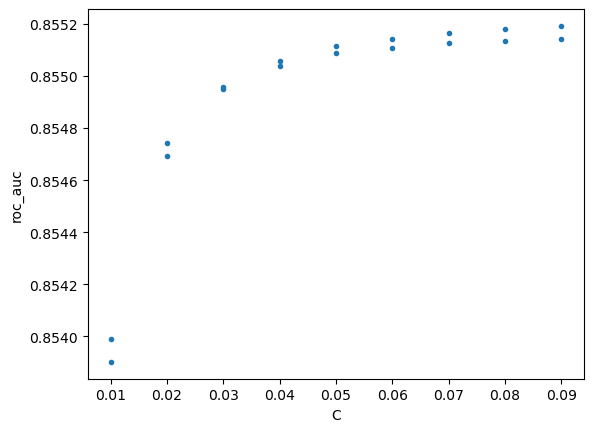

In [90]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

#### Analizando el modelo con el mejor alpha

En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior:

In [91]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [92]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

Aquí es cuando entra en juego el conjunto de Test. Cuando se quiere validar un modelo ya elegido y optimizado.

Con ese modelo optimizado, predigo test para ver cómo se comporta en datos que no ha visto antes.

In [93]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

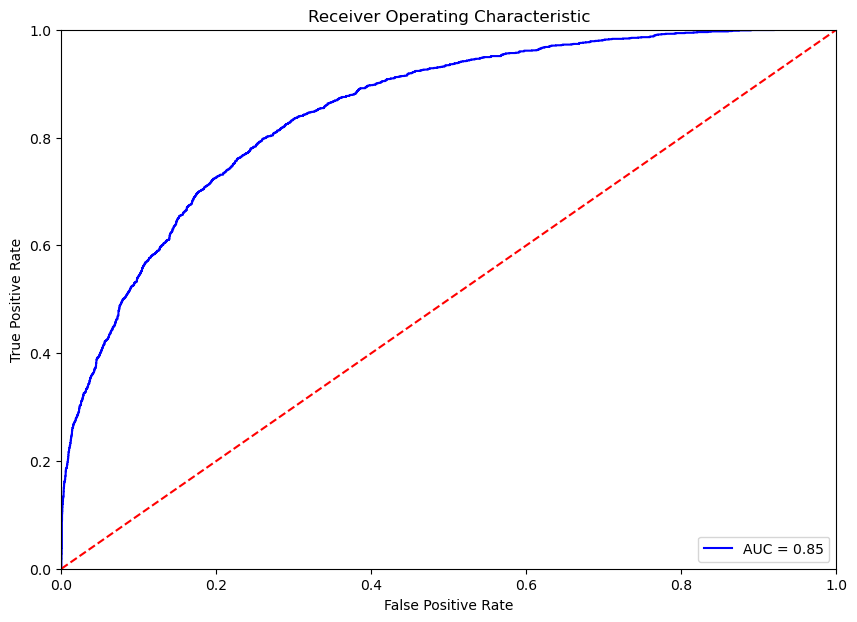

In [94]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Umbralizo las predicciones:

Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0.

In [98]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [99]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    

Matriz de confusión
 [[4132  786]
 [ 537 1058]]

Accuracy	0.8
Sensitividad	0.66
Precisión	0.57


### Resultados

* Verdaderos Positivos (TP): El modelo predijo correctamente que el salario es mayor a 50 mil dólares en 1058 ocasiones.
* Falsos Positivos (FP): El modelo predijo incorrectamente que el salario es mayor a 50 mil dólares en 786 ocasiones cuando en realidad era menor o igual a 50 mil dólares.
* Verdaderos Negativos (TN): El modelo predijo correctamente que el salario es menor o igual a 50 mil dólares en 4132 ocasiones.
* Falsos Negativos (FN): El modelo predijo incorrectamente que el salario es menor o igual a 50 mil dólares en 537 ocasiones cuando en realidad era mayor a 50 mil dólares.

* Accuracy:  el modelo acierta en predecir si un salario es mayor o igual a 50 mil dólares o no en el 80% de los casos.